In [1]:
import torch
from utils import Args
from train import Training

# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [16, 64, 128, 256]
B = [20, 64, 128, 256]
L = [4, 12, 18, 24]
h = [4, 8, 12, 16]
d = [32, 128, 256, 768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1, 10, 20, 30]

args = Args(
    N[0],B[0],L[0],h[0],d[0],
    use_lr_decay[0],learning_rate[0],
    datasets_paths[0],max_iterations[0],
    out_dir=out_dir, val_int=30, cross_val=True)

#### Train models

In [ ]:
training = Training(args)
model, losses = training.train_model()
print(losses.keys())
print(losses['validation'])

#### Cross validation

In [ ]:
training_cross = Training(args)
models, train_loss, val_loss = training_cross.cross_validation()

#### Results

In [5]:
print(train_loss.size()) # 5 folds, 100 grad updates e.g. 5 x 100 matrix.
print(val_loss.size())   # 5 folds, log every 100 grad updates e.g. 5 x 1 matrix
print(val_loss)

torch.Size([5, 100])
torch.Size([5, 3])
tensor([[4.4331, 4.2646, 4.0275],
        [4.3460, 4.2446, 4.0854],
        [4.2609, 4.1145, 3.9276],
        [4.2944, 4.1960, 4.0476],
        [4.2339, 4.1266, 3.9676]])


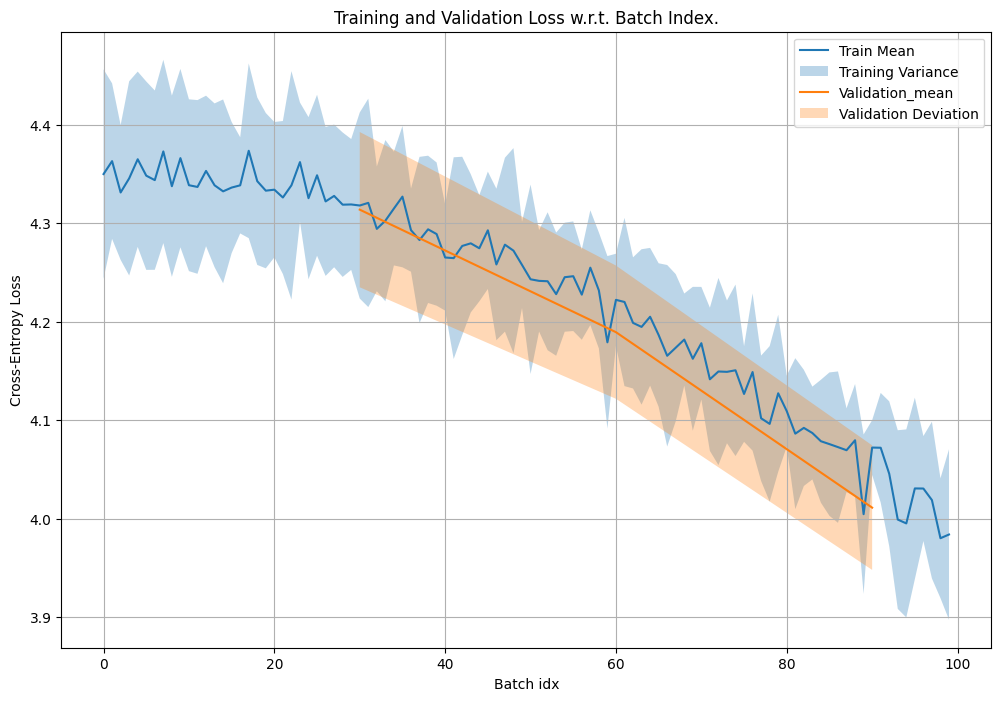

In [6]:
training_cross.losses_graph()

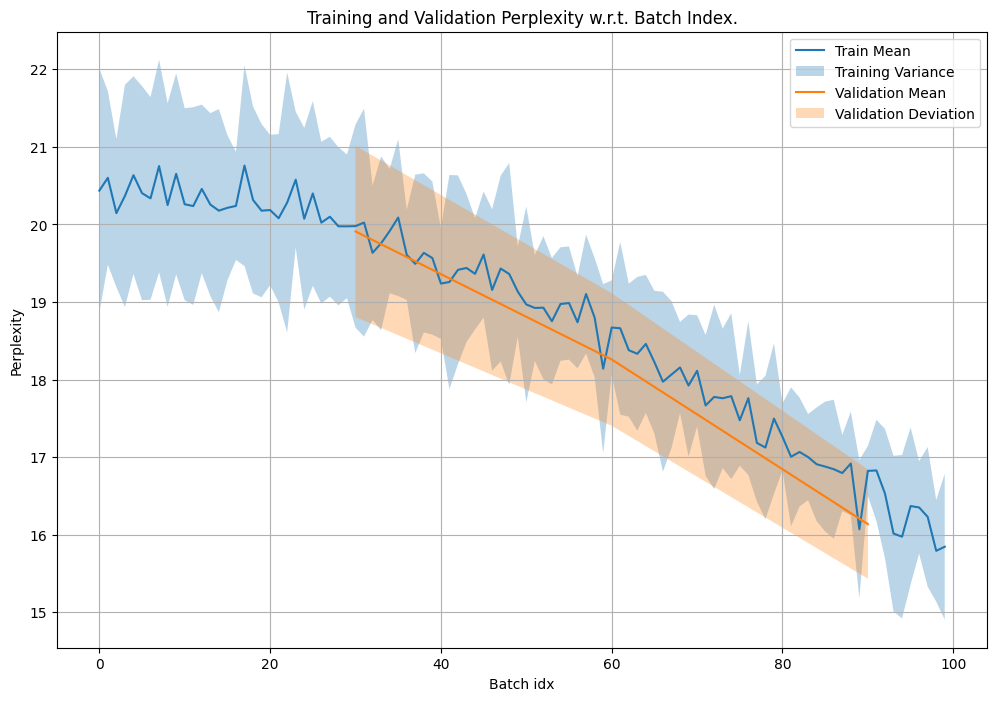

In [7]:
training_cross.perplexity_graph()

### Loading from previous validation run

dict_keys(['k_fold_train_loss', 'k_fold_valid_loss', 'params'])
torch.Size([10, 2])


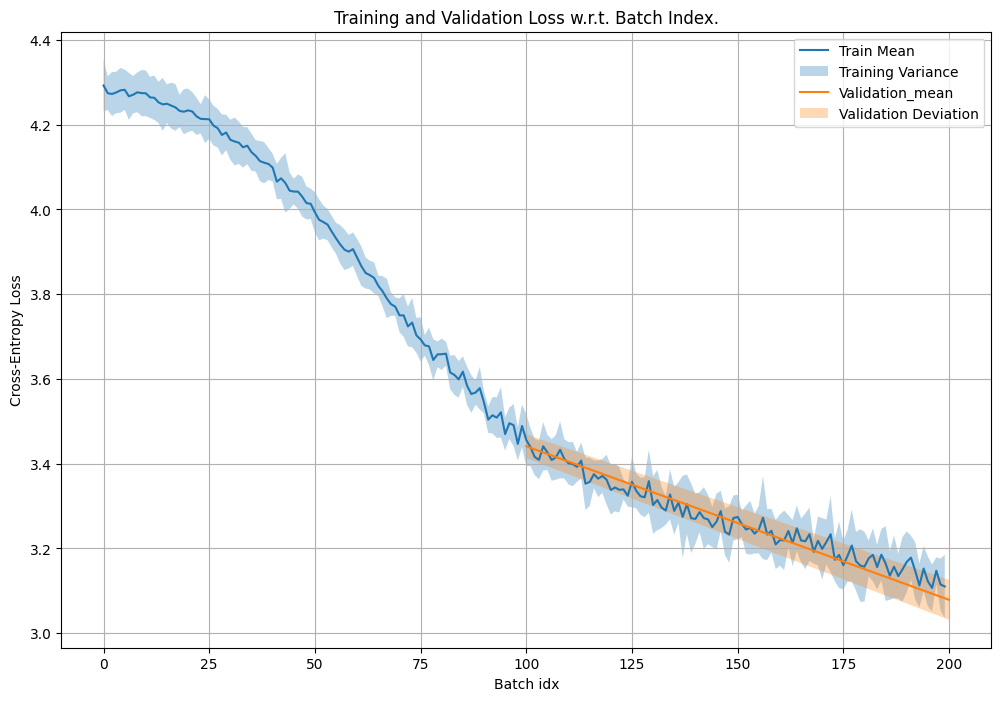

In [4]:
import torch
from utils import cv_losses_graph

cross_val_run = torch.load('./runs/chill_lad/total_cross_val_metrics.pt')   # load final recap file.
print(cross_val_run.keys())
#print(cross_val_run['train_loss'].size(), cross_val_run['val_loss'].size())
print(cross_val_run['k_fold_valid_loss'].size())
cv_losses_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], './runs/chill_lad/', True, "chill_model"          # save graph to same folder
)
